## Lead Scoring Case Study :

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('C:/Users/Soumadeep-Chitti/Desktop/DATA SCIENCE/COURSE2-Machine_Learning1/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv')
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Inspecting the Dataframe :

In [4]:
# Let's check the dimensions of the dataframe
data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Cleaning :

In [7]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [8]:
#check for NA values in dataset
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Drop the columns having more than 70% missing values
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

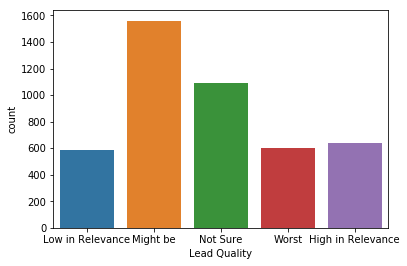

In [12]:
# The next big missing values is present in the column Lead Quality with 51.59% missing values
sns.countplot(data['Lead Quality'])

In [13]:
# We can impute the missing values of Lead Quality with the value 'Not Sure'
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

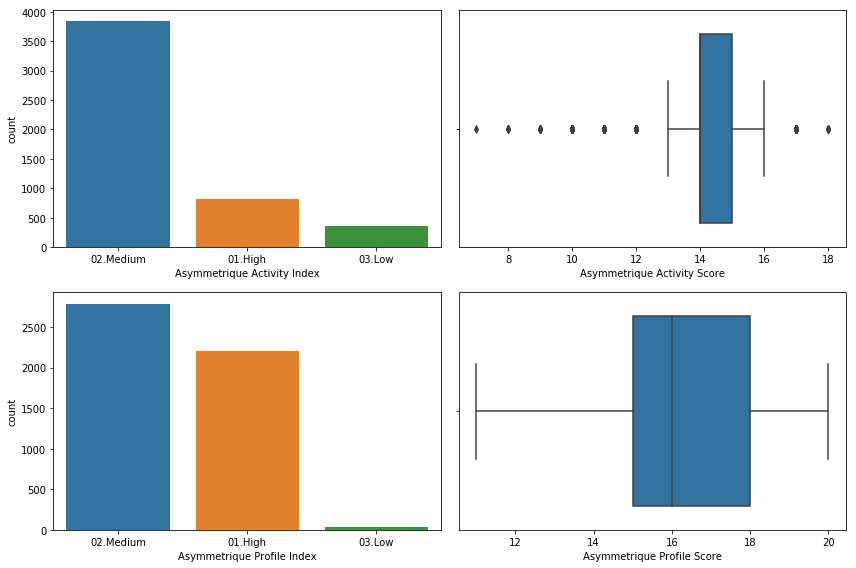

In [14]:
# lets look at the distributions of the columns : Asymmetrique Activity Index,Asymmetrique Activity Score,Asymmetrique Profile Index and Asymmetrique Profile Score
fig, axs = plt.subplots(2,2, figsize = (12,8))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [15]:
# As these columns has high % of missing values we cannot impute these columns
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [16]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# The next big missing values is present in the column is City with 39.71% missing values
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

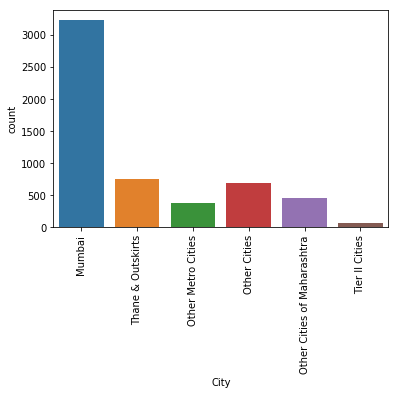

In [18]:
# Visualizing the distribution of City column
sns.countplot(data.City)
xticks(rotation = 90)

In [19]:
# Mumbai has the highest frequency in City column and also the difference between Mumbai and the second highest occurance is huge, so we can impute the missing values with Mumbai
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [20]:
# The next big missing values is present in the column is Specialization with 36.58%
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

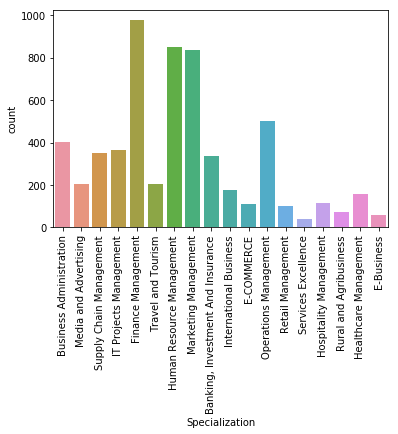

In [21]:
# Visualizing the distribution of Specialization column
sns.countplot(data.Specialization)
xticks(rotation = 90)

In [22]:
# In this case Finance Management only constitutes 16.65% which has the higest occurence and also the other values are close enough. 
# They may be other specialization which was not there in the option or they may be unemployed or may be student.
# So we cannot impute the misisng values with Finance Management.
# Thus we can call them with another category = 'Misc'
data['Specialization'] = data['Specialization'].replace(np.nan, 'Misc')

In [23]:
# The next big missing values is present in the column is Tags with 36.29% missing values
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

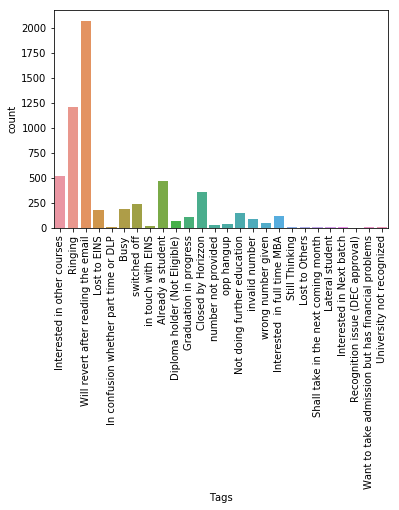

In [24]:
# Visualizing the distribution of Tags column
sns.countplot(data.Tags)
xticks(rotation = 90)

In [25]:
# 'Will revert after reading the email' covers almost 35% and also it's difference with the second highest occurence is huge. 
# So we can impute the missing values with 'Will revert after reading the email'
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [26]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [27]:
# The next big missing values is present in the column is 'What matters most to you in choosing a course' with 29.32% missing values
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [28]:
# 'Better Career Prospects' consists of 99.99% values, so we can impute the missing values with 'Better Career Prospects'
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [29]:
# The next big missing values is present in the column is 'What is your current occupation' with 29.11% mising values
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [30]:
# 85% of the data is Unemployed so we can impute the missing data with Unemployed
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [31]:
# The next big missing values is present in the column is Country with 26.63% missing values
data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [32]:
# India comprises of 95% data so we can impute the missing values with India
data['Country'] = data['Country'].replace(np.nan, 'India')

In [33]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [34]:
# We can drop the remaining misisng values as they are negligible
data.dropna(inplace = True)

In [35]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### EDA :

In [36]:
# Let's check the data balance
balance = (sum(data['Converted'])/len(data['Converted'].index))*100
balance

37.85541106458012

#### Univariate Analysis :

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

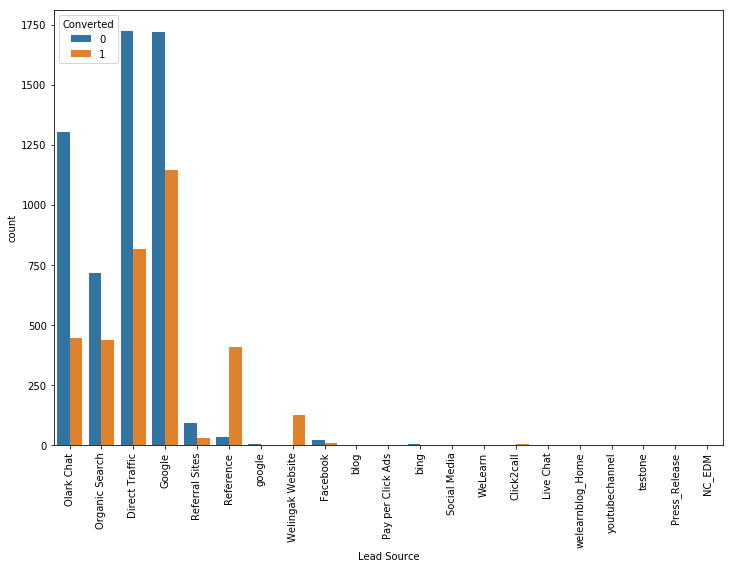

In [37]:
# Lead Source
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

In [38]:
# We can see lots of duplicate column names andfew columns with negligible values. So let's treat them.
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

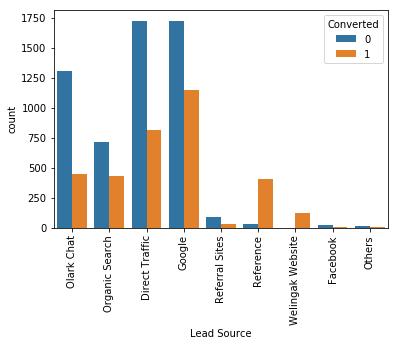

In [39]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

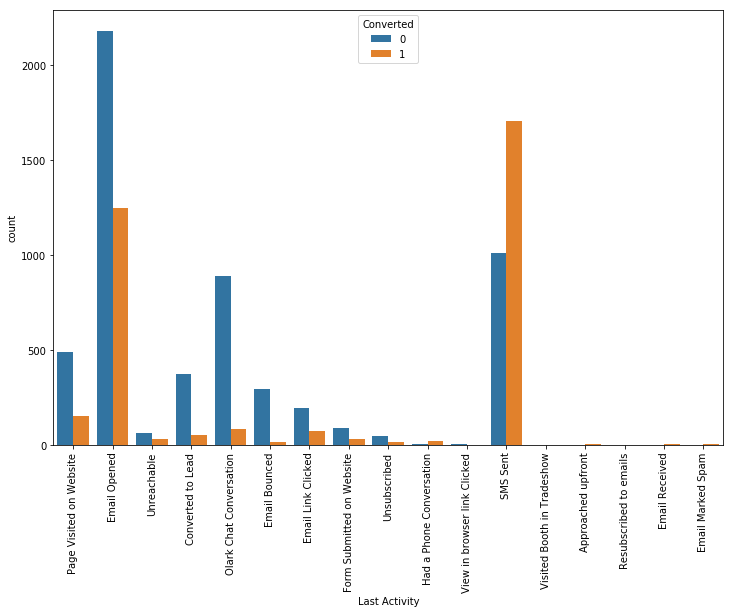

In [135]:
# Last Activity
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [40]:
# Let's club some low occuring Last Activities together
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

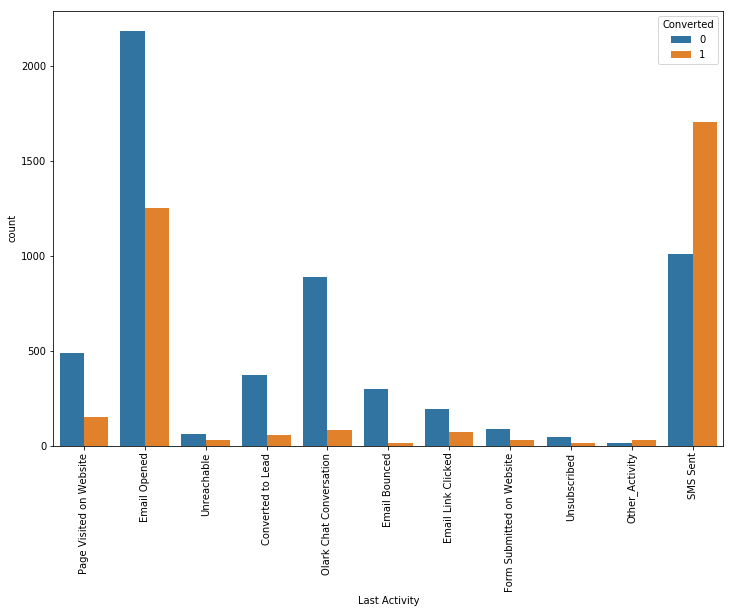

In [41]:
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [42]:
# Let's inspect the country and city combinations
data[['Country', 'City']] 

Country                City
0            India              Mumbai
1            India              Mumbai
2            India              Mumbai
3            India              Mumbai
4            India              Mumbai
5            India              Mumbai
6            India              Mumbai
7            India              Mumbai
8            India   Thane & Outskirts
9            India              Mumbai
10           India  Other Metro Cities
11           India   Thane & Outskirts
12           India              Mumbai
13           India   Thane & Outskirts
14          Russia              Mumbai
15           India              Mumbai
16           India              Mumbai
17           India              Mumbai
18           India              Mumbai
19           India              Mumbai
20           India              Mumbai
21           India              Mumbai
22           India              Mumbai
23           India              Mumbai
24           India              Mumbai
25           India              Mumbai
26           India        Other Cities
27           India              Mumbai
28           India              Mumbai
29           India              Mumbai
...            ...                 ...
9210         India              Mumbai
9211         India              Mumbai
9212         India              Mumbai
9213         India              Mumbai
9214         India              Mumbai
9215         India   Thane & Outskirts
9216         India              Mumbai
9217         India              Mumbai
9218         India              Mumbai
9219         India  Other Metro Cities
9220         India   Thane & Outskirts
9221         India              Mumbai
9222         India        Other Cities
9223         India              Mumbai
9224         India              Mumbai
9225  Saudi Arabia              Mumbai
9226         India              Mumbai
9227         India              Mumbai
9228         India              Mumbai
9229         India              Mumbai
9230         India              Mumbai
9231         India              Mumbai
9232         India              Mumbai
9233         India              Mumbai
9234         India              Mumbai
9235  Saudi Arabia              Mumbai
9236         India              Mumbai
9237         India              Mumbai
9238         India  Other Metro Cities
9239    Bangladesh        Other Cities

[9074 rows x 2 columns]

Since we have imputed 'Mumbai' city to all the missing values, some country which is not 'India' also got assigned as 'Mumbai'

In [43]:
data['Flag'] = data['Country'].apply(lambda x: 1 if x != 'India' else 0)

In [44]:
data['Flag1'] = data['City'].apply(lambda x: 1 if x == 'Mumbai' else 0)

In [45]:
data[['Country', 'City','Flag','Flag1']]

Country                City  Flag  Flag1
0            India              Mumbai     0      1
1            India              Mumbai     0      1
2            India              Mumbai     0      1
3            India              Mumbai     0      1
4            India              Mumbai     0      1
5            India              Mumbai     0      1
6            India              Mumbai     0      1
7            India              Mumbai     0      1
8            India   Thane & Outskirts     0      0
9            India              Mumbai     0      1
10           India  Other Metro Cities     0      0
11           India   Thane & Outskirts     0      0
12           India              Mumbai     0      1
13           India   Thane & Outskirts     0      0
14          Russia              Mumbai     1      1
15           India              Mumbai     0      1
16           India              Mumbai     0      1
17           India              Mumbai     0      1
18           India              Mumbai     0      1
19           India              Mumbai     0      1
20           India              Mumbai     0      1
21           India              Mumbai     0      1
22           India              Mumbai     0      1
23           India              Mumbai     0      1
24           India              Mumbai     0      1
25           India              Mumbai     0      1
26           India        Other Cities     0      0
27           India              Mumbai     0      1
28           India              Mumbai     0      1
29           India              Mumbai     0      1
...            ...                 ...   ...    ...
9210         India              Mumbai     0      1
9211         India              Mumbai     0      1
9212         India              Mumbai     0      1
9213         India              Mumbai     0      1
9214         India              Mumbai     0      1
9215         India   Thane & Outskirts     0      0
9216         India              Mumbai     0      1
9217         India              Mumbai     0      1
9218         India              Mumbai     0      1
9219         India  Other Metro Cities     0      0
9220         India   Thane & Outskirts     0      0
9221         India              Mumbai     0      1
9222         India        Other Cities     0      0
9223         India              Mumbai     0      1
9224         India              Mumbai     0      1
9225  Saudi Arabia              Mumbai     1      1
9226         India              Mumbai     0      1
9227         India              Mumbai     0      1
9228         India              Mumbai     0      1
9229         India              Mumbai     0      1
9230         India              Mumbai     0      1
9231         India              Mumbai     0      1
9232         India              Mumbai     0      1
9233         India              Mumbai     0      1
9234         India              Mumbai     0      1
9235  Saudi Arabia              Mumbai     1      1
9236         India              Mumbai     0      1
9237         India              Mumbai     0      1
9238         India  Other Metro Cities     0      0
9239    Bangladesh        Other Cities     1      0

[9074 rows x 4 columns]

The countries which are not 'India' but got assigned as 'Mumbai' as their respective city are flagged as Flag = 1 and Flag1 = 1

In [46]:
data = data.drop(data[(data.Flag == 1) & (data.Flag1 == 1)].index)

In [47]:
data[['Country', 'City','Flag','Flag1']]

Country                City  Flag  Flag1
0          India              Mumbai     0      1
1          India              Mumbai     0      1
2          India              Mumbai     0      1
3          India              Mumbai     0      1
4          India              Mumbai     0      1
5          India              Mumbai     0      1
6          India              Mumbai     0      1
7          India              Mumbai     0      1
8          India   Thane & Outskirts     0      0
9          India              Mumbai     0      1
10         India  Other Metro Cities     0      0
11         India   Thane & Outskirts     0      0
12         India              Mumbai     0      1
13         India   Thane & Outskirts     0      0
15         India              Mumbai     0      1
16         India              Mumbai     0      1
17         India              Mumbai     0      1
18         India              Mumbai     0      1
19         India              Mumbai     0      1
20         India              Mumbai     0      1
21         India              Mumbai     0      1
22         India              Mumbai     0      1
23         India              Mumbai     0      1
24         India              Mumbai     0      1
25         India              Mumbai     0      1
26         India        Other Cities     0      0
27         India              Mumbai     0      1
28         India              Mumbai     0      1
29         India              Mumbai     0      1
30         India              Mumbai     0      1
...          ...                 ...   ...    ...
9208       India              Mumbai     0      1
9209       India              Mumbai     0      1
9210       India              Mumbai     0      1
9211       India              Mumbai     0      1
9212       India              Mumbai     0      1
9213       India              Mumbai     0      1
9214       India              Mumbai     0      1
9215       India   Thane & Outskirts     0      0
9216       India              Mumbai     0      1
9217       India              Mumbai     0      1
9218       India              Mumbai     0      1
9219       India  Other Metro Cities     0      0
9220       India   Thane & Outskirts     0      0
9221       India              Mumbai     0      1
9222       India        Other Cities     0      0
9223       India              Mumbai     0      1
9224       India              Mumbai     0      1
9226       India              Mumbai     0      1
9227       India              Mumbai     0      1
9228       India              Mumbai     0      1
9229       India              Mumbai     0      1
9230       India              Mumbai     0      1
9231       India              Mumbai     0      1
9232       India              Mumbai     0      1
9233       India              Mumbai     0      1
9234       India              Mumbai     0      1
9236       India              Mumbai     0      1
9237       India              Mumbai     0      1
9238       India  Other Metro Cities     0      0
9239  Bangladesh        Other Cities     1      0

[8921 rows x 4 columns]

In [48]:
# Removing the columns Flag and Flag1
data = data.drop(['Flag','Flag1'],1)

In [49]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 31 columns]

In [50]:
data.shape

(8921, 31)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

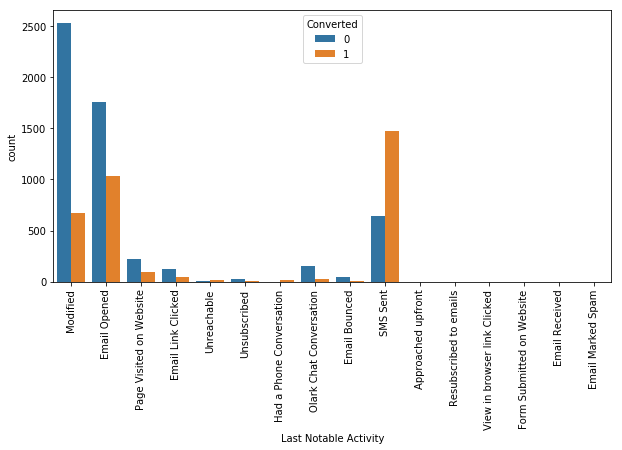

In [51]:
# Last Notable Activity
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [52]:
#There are lots of columns with negligible frequency. We can drop them :
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

### Data Preparation :

In [53]:
data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                     Misc                      Unemployed   
1                     Misc                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                     Misc                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [54]:
data.shape

(8921, 16)

#### Converting some binary variables (Yes/No) to 0/1

In [55]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [56]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
data = pd.concat([data, dummy1], axis=1)
data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Last Notable Activity_Form Submitted on Website  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   
3  ...                                               0   
4  ...                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Page Visited on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  Last Notable Activity_Resubscribed to emails  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3

#### Dropping the repeated variables

In [57]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [58]:
data.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Acti

In [59]:
data.shape

(8921, 100)

### Outliers Treatment :

In [60]:
# Checking for outliers in the continuous variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921 entries, 0 to 9239
Data columns (total 100 columns):
Prospect ID                                               8921 non-null object
Do Not Email                                              8921 non-null int64
Do Not Call                                               8921 non-null int64
Converted                                                 8921 non-null int64
TotalVisits                                               8921 non-null float64
Total Time Spent on Website                               8921 non-null int64
Page Views Per Visit                                      8921 non-null float64
Lead Origin_Landing Page Submission                       8921 non-null uint8
Lead Origin_Lead Add Form                                 8921 non-null uint8
Lead Origin_Lead Import                                   8921 non-null uint8
Lead Source_Facebook                                      8921 non-null uint8
Lead Source_Google           

In [61]:
num_data = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [62]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8921.000000                  8921.000000           8921.000000
mean      3.447820                   481.610694              2.362847
std       4.877375                   545.265698              2.157018
min       0.000000                     0.000000              0.000000
25%       1.000000                     7.000000              1.000000
50%       3.000000                   244.000000              2.000000
75%       5.000000                   923.000000              3.250000
90%       7.000000                  1372.000000              5.000000
95%      10.000000                  1555.000000              6.000000
99%      17.000000                  1838.600000              9.000000
max     251.000000                  2272.000000             55.000000

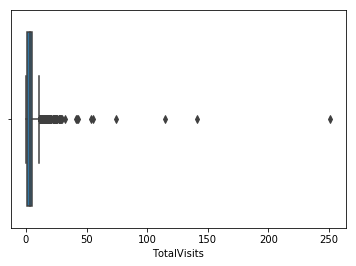

In [63]:
sns.boxplot(data['TotalVisits'])

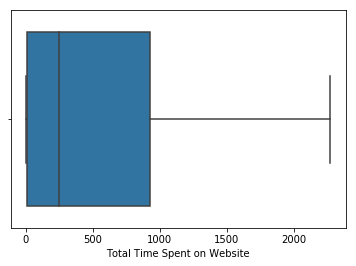

In [64]:
sns.boxplot(data['Total Time Spent on Website'])

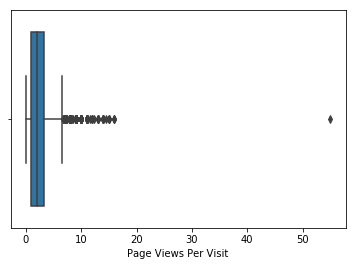

In [65]:
sns.boxplot(data['Page Views Per Visit'])

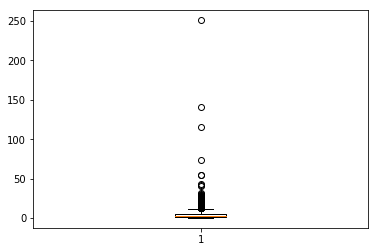

In [66]:
plt.boxplot(data.TotalVisits)
Q1 = data.TotalVisits.quantile(0.05)
Q3 = data.TotalVisits.quantile(0.95)
data = data[(data.TotalVisits >= Q1) & (data.TotalVisits <= Q3)]

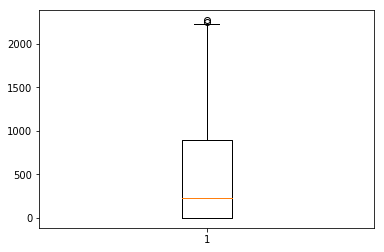

In [67]:
plt.boxplot(data['Total Time Spent on Website'])
Q1 = data['Total Time Spent on Website'].quantile(0.05)
Q3 = data['Total Time Spent on Website'].quantile(0.95)
data = data[(data['Total Time Spent on Website'] >= Q1) & (data['Total Time Spent on Website'] <= Q3)]

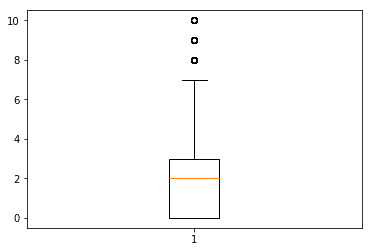

In [68]:
plt.boxplot(data['Page Views Per Visit'])
Q1 = data['Page Views Per Visit'].quantile(0.05)
Q3 = data['Page Views Per Visit'].quantile(0.95)
data = data[(data['Page Views Per Visit'] >= Q1) & (data['Page Views Per Visit'] <= Q3)]

### Test-Train Split :

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0           

In [71]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling :

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

E:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\ANACONDA\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3484             0            0    -0.292608                     2.326796   
1239             0            0    -0.292608                    -0.650746   
2456             1            0    -0.292608                     0.067604   
5858             0            0    -0.292608                     1.563814   
7578             0            0     1.421917                    -0.561484   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3484             -0.008915                                    1   
1239             -0.008915                                    1   
2456             -0.008915                                    1   
5858             -0.008915                                    1   
7578              0.595952                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3484                          0                        0   
1239                          0                        0   
2456                          0                        0   
5858                          0                        0   
7578                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3484                     0                   0  ...   
1239                     0                   0  ...   
2456                     0                   1  ...   
5858                     0                   1  ...   
7578                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3484                                                0   
1239                                                0   
2456                                                0   
5858                                                0   
7578                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3484                                               0   
1239                                               0   
2456                                               0   
5858                                               0   
7578                                               0   

      Last Notable Activity_Modified  \
3484                               0   
1239                               0   
2456                               1   
5858                               0   
7578                               0   

      Last Notable Activity_Olark Chat Conversation  \
3484                                              0   
1239                                              0   
2456                                              0   
5858                                              0   
7578                                              0   

      Last Notable Activity_Page Visited on Website  \
3484                                              0   
1239                                              0   
2456                                              0   
5858                                              0   
7578                                              0   

      Last Notable Activity_Resubscribed to emails  \
3484                                             0   
1239                                             0   
2456                                             0   
5858                                             0   
7578                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3484                               1                                  0   
1239                               0                                  0   
2456                               0                                  0   
5858                               0                                  0   
7578                               1                                  0   

      Last Notable Activity_Unsubscribed  \
3484                                   0   
1

### Looking at Correlations :

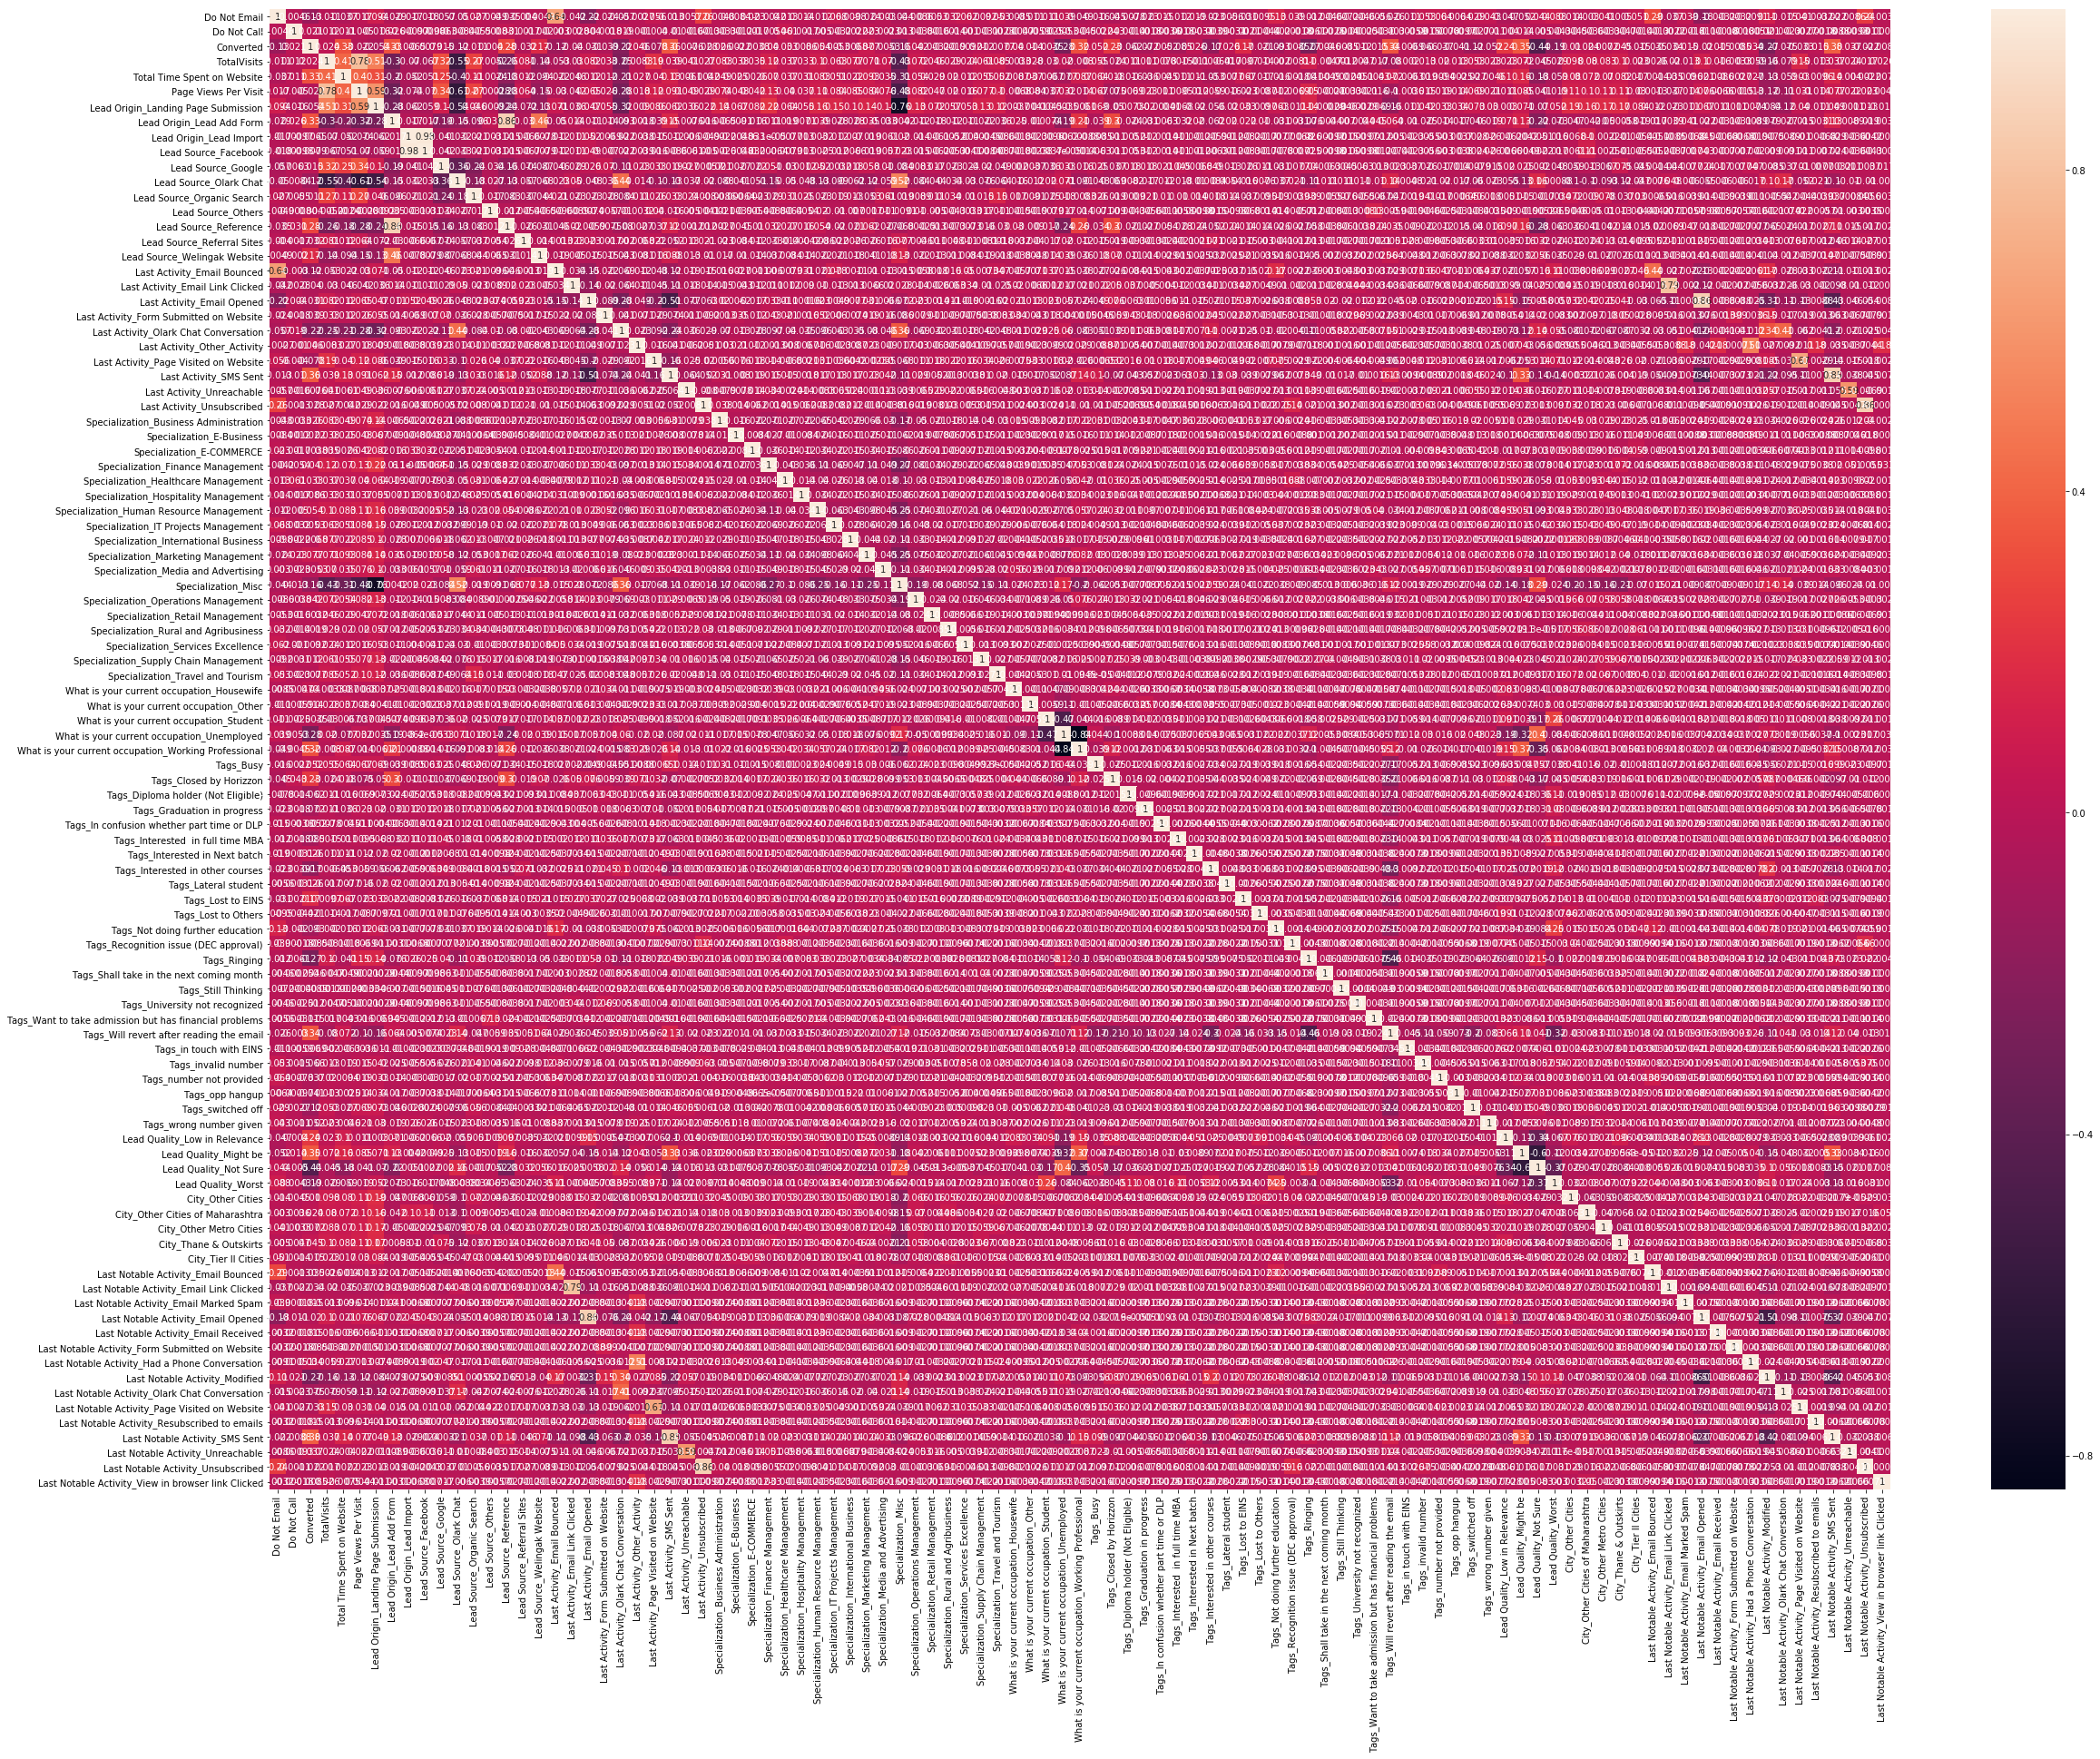

In [75]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

### Model Building :

In [76]:
import statsmodels.api as sm

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5429
Model Family:                Binomial   Df Model:                           94
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2019   Deviance:                          nan
Time:                        02:24:37   Pearson chi2:                 2.90e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    -2.7e+15   3.85e+07  -7.02e+07      0.000    -2.7e+15    -2.7e+15
Do Not Email                                           -1.271e+14   5.02e+06  -2.53e+07      0.000   -1.27e+14   -1.27e+14
Do Not Call                                             1.304e+16   4.79e+07   2.72e+08      0.000     1.3e+16     1.3e+16
TotalVisits                                            -9.158e+12   1.58e+06   -5.8e+06      0.000   -9.16e+12   -9.16e+12
Total Time Spent on Website                             4.226e+13   1.11e+06    3.8e+07      0.000    4.23e+13    4.23e+13
Page Views Per Visit                                    3.171e+12   1.71e+06   1.85e+06      0.000    3.17e+12    3.17e+12
Lead Origin_Landing Page Submission                    -8.252e+13   3.74e+06  -2.21e+07      0.000   -8.25e+13   -8.25e+13
Lead Origin_Lead Add Form                               4.642e+13   2.94e+07   1.58e+06      0.000    4.64e+13    4.64e+13
Lead Origin_Lead Import                                  6.62e+15   6.97e+07    9.5e+07      0.000    6.62e+15    6.62e+15
Lead Source_Facebook                                   -6.376e+15    6.8e+07  -9.37e+07      0.000   -6.38e+15   -6.38e+15
Lead Source_Google                                     -2.627e+13   2.64e+06  -9.93e+06      0.000   -2.63e+13   -2.63e+13
Lead Source_Olark Chat                                  6.728e+14   4.32e+06   1.56e+08      0.000    6.73e+14    6.73e+14
Lead Source_Organic Search                              5.881e+13   3.63e+06   1.62e+07      0.000    5.88e+13    5.88e+13
Lead Source_Others                                     -4.429e+14   1.92e+07   -2.3e+07      0.000   -4.43e+14   -4.43e+14
Lead Source_Reference                                  -7.216e+13   2.96e+07  -2.44e+06      0.000   -7.22e+13   -7.22e+13
Lead Source_Referral Sites                               6.81e+13   9.19e+06   7.41e+06      0.000    6.81e+13    6.81e+13
Lead Source_Welingak Website                            5.183e+14   3.03e+07   1.71e+07      0.000    5.18e+14    5.18e+14
Last Activity_Email Bounced                            -1.643e+14   8.35e+06  -1.97e+07      0.000   -1.64e+14   -1.64e+14
Last Activity_Email Link Clicked                        3.054e+13   9.45e+06   3.23e+06      0.000    3.05e+13    3.05e+13
Last Activity_Email Opened                             -2.761e+14   5.53e+06  -4.99e+07      0.000   -2.76e+14   -2.76e+14
Last Activity_Form Submitted on Website                -1.608e+14    8.9e+06  -1.81e+07      0.000   -1.61e+14   -1.61e+14
Last Activity_Olark Chat Conversation                  -6.656e+14   5.42e+06  -1.23e+08      0.000   -6.66e+14   -6.66e+14
Last Activity_Other_Activity                           -1.364e+14    1.7e+07  -8.01e+06

#### Feature Selection Using RFE :

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 40),
 ('TotalVisits', False, 61),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 53),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 68),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Others', False, 71),
 ('Lead Source_Reference', False, 67),
 ('Lead Source_Referral Sites', False, 72),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 50),
 ('Last Activity_Email Opened', False, 58),
 ('Last Activity_Form Submitted on Website', False, 70),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 48),
 ('Last Activity_Page Visited on Website', False, 52),
 ('Last Activity_SMS Sent'

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Other_Activity', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Reso

#### Assessing the model with StatsModels :

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5508
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.4
Date:                Sun, 17 Nov 2019   Deviance:                       2682.8
Time:                        02:25:12   Pearson chi2:                 2.75e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8399      0.245     -7.518      0.000      -2.320      -1.360
Lead Origin_Lead Add Form                    1.2438      0.393      3.163      0.002       0.473       2.014
Lead Source_Welingak Website                 3.5535      1.090      3.259      0.001       1.416       5.691
Last Activity_Olark Chat Conversation       -1.3866      0.207     -6.690      0.000      -1.793      -0.980
Tags_Busy                                    3.5460      0.371      9.558      0.000       2.819       4.273
Tags_Closed by Horizzon                     28.6565   1.37e+04      0.002      0.998   -2.68e+04    2.69e+04
Tags_Lost to EINS                            8.9921      0.766     11.734      0.000       7.490      10.494
Tags_Ringing                                -1.7978      0.371     -4.840      0.000      -2.526      -1.070
Tags_Will revert after reading the email     3.8488      0.263     14.615      0.000       3.333       4.365
Tags_in touch with EINS                      2.8504      0.998      2.857      0.004       0.895       4.806
Tags_invalid number                        -23.3648   2.55e+04     -0.001      0.999   -5.01e+04       5e+04
Tags_switched off                           -3.2786      0.781     -4.198      0.000      -4.809      -1.748
Tags_wrong number given                    -23.6648   3.58e+04     -0.001      0.999   -7.02e+04    7.01e+04
Lead Quality_Not Sure                       -3.4849      0.137    -25.359      0.000      -3.754      -3.216
Lead Quality_Worst                          -3.7910      0.922     -4.113      0.000      -5.598      -1.984
Last Notable Activity_SMS Sent               2.6628      0.128     20.738      0.000       2.411       2.915
============================================================================================================
"""

In [85]:
#Column 'Tags_invalid number' has a hig p-value i.e. 0.999 so let's drop it
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [86]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5509
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1345.7
Date:                Sun, 17 Nov 2019   Deviance:                       2691.5
Time:                        02:25:18   Pearson chi2:                 2.72e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0017      0.248     -8.072      0.000      -2.488      -1.516
Lead Origin_Lead Add Form                    1.2855      0.397      3.241      0.001       0.508       2.063
Lead Source_Welingak Website                 3.5072      1.092      3.213      0.001       1.368       5.647
Last Activity_Olark Chat Conversation       -1.3890      0.207     -6.703      0.000      -1.795      -0.983
Tags_Busy                                    3.7214      0.371     10.021      0.000       2.994       4.449
Tags_Closed by Horizzon                     28.8075   1.37e+04      0.002      0.998   -2.68e+04    2.69e+04
Tags_Lost to EINS                            9.1472      0.767     11.918      0.000       7.643      10.651
Tags_Ringing                                -1.6103      0.371     -4.341      0.000      -2.337      -0.883
Tags_Will revert after reading the email     4.0100      0.266     15.066      0.000       3.488       4.532
Tags_in touch with EINS                      3.0162      0.997      3.024      0.002       1.061       4.971
Tags_switched off                           -3.0858      0.781     -3.953      0.000      -4.616      -1.556
Tags_wrong number given                    -23.4771   3.58e+04     -0.001      0.999   -7.03e+04    7.02e+04
Lead Quality_Not Sure                       -3.4765      0.137    -25.334      0.000      -3.746      -3.208
Lead Quality_Worst                          -3.7968      0.923     -4.114      0.000      -5.606      -1.988
Last Notable Activity_SMS Sent               2.6300      0.127     20.726      0.000       2.381       2.879
============================================================================================================
"""

In [87]:
#Column 'Tags_wrong number given' has a hig p-value i.e. 0.999 so let's drop it
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [88]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5510
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1348.4
Date:                Sun, 17 Nov 2019   Deviance:                       2696.9
Time:                        02:25:25   Pearson chi2:                 2.71e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1152      0.249     -8.486      0.000      -2.604      -1.627
Lead Origin_Lead Add Form                    1.3141      0.399      3.291      0.001       0.531       2.097
Lead Source_Welingak Website                 3.4763      1.092      3.182      0.001       1.335       5.617
Last Activity_Olark Chat Conversation       -1.3902      0.207     -6.710      0.000      -1.796      -0.984
Tags_Busy                                    3.8430      0.371     10.361      0.000       3.116       4.570
Tags_Closed by Horizzon                     28.9134   1.37e+04      0.002      0.998   -2.68e+04    2.68e+04
Tags_Lost to EINS                            9.2504      0.768     12.044      0.000       7.745      10.756
Tags_Ringing                                -1.4825      0.370     -4.007      0.000      -2.208      -0.757
Tags_Will revert after reading the email     4.1235      0.267     15.437      0.000       3.600       4.647
Tags_in touch with EINS                      3.1321      0.997      3.141      0.002       1.177       5.087
Tags_switched off                           -2.9553      0.780     -3.789      0.000      -4.484      -1.426
Lead Quality_Not Sure                       -3.4726      0.137    -25.326      0.000      -3.741      -3.204
Lead Quality_Worst                          -3.6938      0.931     -3.969      0.000      -5.518      -1.870
Last Notable Activity_SMS Sent               2.6116      0.126     20.715      0.000       2.365       2.859
============================================================================================================
"""

In [89]:
#Column 'Tags_Closed by Horizzon' has a hig p-value i.e. 0.998 so let's drop it
col3 = col2.drop('Tags_Closed by Horizzon',1)
col3

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [90]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5511
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1548.1
Date:                Sun, 17 Nov 2019   Deviance:                       3096.2
Time:                        02:25:31   Pearson chi2:                 2.27e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0428      0.127     -0.338      0.736      -0.291       0.206
Lead Origin_Lead Add Form                    2.5822      0.339      7.611      0.000       1.917       3.247
Lead Source_Welingak Website                 3.2474      1.082      3.000      0.003       1.126       5.369
Last Activity_Olark Chat Conversation       -1.4245      0.195     -7.289      0.000      -1.808      -1.041
Tags_Busy                                    1.7468      0.295      5.925      0.000       1.169       2.325
Tags_Lost to EINS                            7.2246      0.745      9.699      0.000       5.765       8.684
Tags_Ringing                                -3.5126      0.302    -11.624      0.000      -4.105      -2.920
Tags_Will revert after reading the email     1.9638      0.148     13.227      0.000       1.673       2.255
Tags_in touch with EINS                      1.0355      0.961      1.077      0.281      -0.848       2.919
Tags_switched off                           -4.8915      0.752     -6.508      0.000      -6.365      -3.418
Lead Quality_Not Sure                       -3.3432      0.122    -27.436      0.000      -3.582      -3.104
Lead Quality_Worst                          -4.9999      0.624     -8.010      0.000      -6.223      -3.777
Last Notable Activity_SMS Sent               2.4610      0.121     20.257      0.000       2.223       2.699
============================================================================================================
"""

In [91]:
#Column 'Tags_in touch with EINS' has a hig p-value i.e. 0.281 so let's drop it
col4 = col3.drop('Tags_in touch with EINS',1)
col4

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [92]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5524
Model:                            GLM   Df Residuals:                     5512
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1548.7
Date:                Sun, 17 Nov 2019   Deviance:                       3097.4
Time:                        02:25:38   Pearson chi2:                 2.27e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0265      0.126     -0.211      0.833      -0.273       0.220
Lead Origin_Lead Add Form                    2.5711      0.339      7.580      0.000       1.906       3.236
Lead Source_Welingak Website                 3.2475      1.082      3.001      0.003       1.127       5.368
Last Activity_Olark Chat Conversation       -1.4255      0.195     -7.294      0.000      -1.809      -1.042
Tags_Busy                                    1.7283      0.294      5.874      0.000       1.152       2.305
Tags_Lost to EINS                            7.2102      0.745      9.679      0.000       5.750       8.670
Tags_Ringing                                -3.5299      0.302    -11.698      0.000      -4.121      -2.938
Tags_Will revert after reading the email     1.9463      0.147     13.214      0.000       1.658       2.235
Tags_switched off                           -4.9095      0.751     -6.534      0.000      -6.382      -3.437
Lead Quality_Not Sure                       -3.3419      0.122    -27.448      0.000      -3.581      -3.103
Lead Quality_Worst                          -5.0141      0.623     -8.045      0.000      -6.236      -3.793
Last Notable Activity_SMS Sent               2.4628      0.122     20.267      0.000       2.225       2.701
============================================================================================================
"""

Now the p-values are pretty low so we can proceed prediction on train set

In [93]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3484    0.987661
1239    0.000254
2456    0.001553
5858    0.872112
7578    0.250950
2126    0.927209
797     0.194326
1648    0.194326
2515    0.162440
5986    0.194326
dtype: float64

In [94]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.87661355e-01, 2.53989482e-04, 1.55274800e-03, 8.72112241e-01,
       2.50950375e-01, 9.27209338e-01, 1.94326468e-01, 1.94326468e-01,
       1.62440360e-01, 1.94326468e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities :

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          1        0.987661         3484
1          0        0.000254         1239
2          0        0.001553         2456
3          1        0.872112         5858
4          0        0.250950         7578

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          1        0.987661         3484          1
1          0        0.000254         1239          0
2          0        0.001553         2456          0
3          1        0.872112         5858          1
4          0        0.250950         7578          0

In [97]:
from sklearn import metrics

In [98]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3344  155]
 [ 386 1639]]


In [195]:
# Predicted     not_churn    churn
# Actual
# not_churn        3344      155
# churn            386       1639  

In [99]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9020637219406228


#### Checking VIFs :

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1               Lead Source_Welingak Website  1.31
4                          Tags_Lost to EINS  1.14
10            Last Notable Activity_SMS Sent  1.12
3                                  Tags_Busy  1.11
5                               Tags_Ringing  1.04
9                         Lead Quality_Worst  1.03
8                      Lead Quality_Not Sure  1.00
0                  Lead Origin_Lead Add Form  0.55
6   Tags_Will revert after reading the email  0.45
2      Last Activity_Olark Chat Conversation  0.23
7                          Tags_switched off  0.17

The VIFs are also pretty low

### Metrics beyond simply accuracy :

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8093827160493827

In [104]:
# Let's see the specificity
TN / float(TN+FP)

0.9557016290368677

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04429837096313232


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.9136008918617614


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.896514745308311


### Plotting the ROC Curve :

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

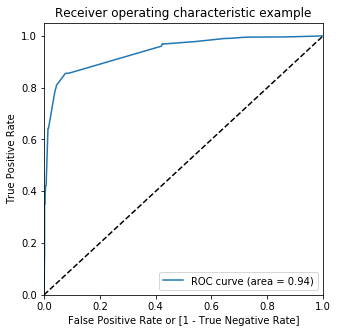

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point :

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.987661         3484          1    1    1    1    1    1   
1          0        0.000254         1239          0    1    0    0    0    0   
2          0        0.001553         2456          0    1    0    0    0    0   
3          1        0.872112         5858          1    1    1    1    1    1   
4          0        0.250950         7578          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    0    0    0    0    0

In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.366582  1.000000  0.000000
0.1   0.1  0.718863  0.968889  0.574164
0.2   0.2  0.889754  0.856790  0.908831
0.3   0.3  0.899529  0.851852  0.927122
0.4   0.4  0.898986  0.849877  0.927408
0.5   0.5  0.902064  0.809383  0.955702
0.6   0.6  0.902064  0.809383  0.955702
0.7   0.7  0.896995  0.786173  0.961132
0.8   0.8  0.859160  0.643457  0.983995
0.9   0.9  0.784214  0.424198  0.992569


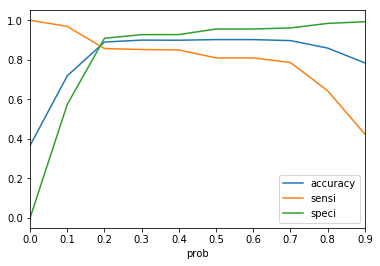

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.987661         3484          1    1    1    1    1    1   
1          0        0.000254         1239          0    1    0    0    0    0   
2          0        0.001553         2456          0    1    0    0    0    0   
3          1        0.872112         5858          1    1    1    1    1    1   
4          0        0.250950         7578          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    0    0    0    0    0                1

In [116]:
# Assigning Lead Score 
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.987661         3484          1    1    1    1    1    1   
1          0        0.000254         1239          0    1    0    0    0    0   
2          0        0.001553         2456          0    1    0    0    0    0   
3          1        0.872112         5858          1    1    1    1    1    1   
4          0        0.250950         7578          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    1    1    1    1    1                1          99  
1    0    0    0    0    0                0           0  
2    0    0    0    0    0                0           0  
3    1    1    1    1    0                1          87  
4    0    0    0    0    0                1          25

In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8897538015930485

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3180,  319],
       [ 290, 1735]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8567901234567902

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.9088310945984567

In [122]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0911689054015433


In [123]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8446932814021422


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9164265129682997


### Precision and Recall :

In [125]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3344,  155],
       [ 386, 1639]], dtype=int64)

#### Precision
TP / TP + FP

In [126]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9136008918617614

#### Recall
TP / TP + FN

In [127]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8093827160493827

Using sklearn utilities for the same

In [128]:
from sklearn.metrics import precision_score, recall_score

In [129]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9136008918617614

In [130]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8093827160493827

### Precision and recall tradeoff :

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 5494    0
 5495    0
 5496    1
 5497    1
 5498    0
 5499    1
 5500    1
 5501    1
 5502    0
 5503    1
 5504    0
 5505    0
 5506    0
 5507    1
 5508    0
 5509    1
 5510    0
 5511    0
 5512    1
 5513    0
 5514    0
 5515    1
 5516    1
 5517    1
 5518    0
 5519    0
 5520    1
 5521    0
 5522    0
 5523    0
 Name: Converted, Length: 5524, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       0
 8       0
 9       0
 10      1
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      0
 18      1
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

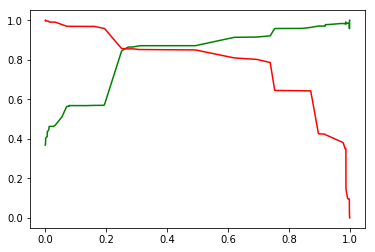

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set :

In [135]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

E:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\ANACONDA\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [136]:
X_test = X_test[col4]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
5100                          0                             0   
1931                          0                             0   
5564                          0                             0   
511                           0                             0   
8617                          0                             0   

      Last Activity_Olark Chat Conversation  Tags_Busy  Tags_Lost to EINS  \
5100                                      1          0                  0   
1931                                      0          0                  0   
5564                                      0          0                  0   
511                                       0          0                  0   
8617                                      0          0                  0   

      Tags_Ringing  Tags_Will revert after reading the email  \
5100             0                                         1   
1931             0                                         1   
5564             1                                         0   
511              1                                         0   
8617             0                                         1   

      Tags_switched off  Lead Quality_Not Sure  Lead Quality_Worst  \
5100                  0                      1                   0   
1931                  0                      1                   0   
5564                  0                      1                   0   
511                   0                      0                   0   
8617                  0                      0                   0   

      Last Notable Activity_SMS Sent  
5100                               0  
1931                               0  
5564                               0  
511                                0  
8617                               0

In [137]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [138]:
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

5100    0.054804
1931    0.194326
5564    0.001008
511     0.027750
8617    0.872112
9134    0.996853
6587    0.872112
529     0.978995
1078    0.033297
7997    0.033297
dtype: float64

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
y_pred_1.head()

0
5100  0.054804
1931  0.194326
5564  0.001008
511   0.027750
8617  0.872112

In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         5100  0.054804
1          1         1931  0.194326
2          0         5564  0.001008
3          0          511  0.027750
4          1         8617  0.872112

In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [148]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [149]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         5100          0        0.054804
1         1931          1        0.194326
2         5564          0        0.001008
3          511          0        0.027750
4         8617          1        0.872112

In [150]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [151]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         5100          0        0.054804                0
1         1931          1        0.194326                0
2         5564          0        0.001008                0
3          511          0        0.027750                0
4         8617          1        0.872112                1

In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8847128378378378

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  143],
       [ 130,  698]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8429951690821256

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9071428571428571

### Plotting the ROC Curve :

In [157]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False )

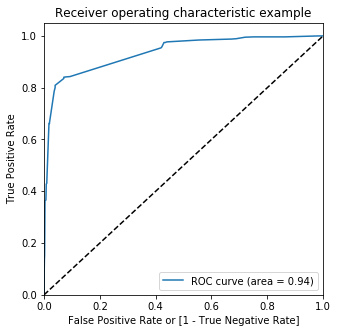

(array([0.00000000e+00, 0.00000000e+00, 6.49350649e-04, 6.49350649e-04,
        6.49350649e-04, 6.49350649e-04, 6.49350649e-04, 6.49350649e-04,
        6.49350649e-04, 1.29870130e-03, 1.94805195e-03, 3.24675325e-03,
        6.49350649e-03, 7.14285714e-03, 7.14285714e-03, 7.79220779e-03,
        7.79220779e-03, 9.74025974e-03, 9.74025974e-03, 9.74025974e-03,
        1.75324675e-02, 1.88311688e-02, 1.94805195e-02, 1.94805195e-02,
        1.94805195e-02, 3.57142857e-02, 3.57142857e-02, 3.96103896e-02,
        3.96103896e-02, 7.07792208e-02, 7.07792208e-02, 7.85714286e-02,
        9.28571429e-02, 4.19480519e-01, 4.22077922e-01, 4.29870130e-01,
        4.34415584e-01, 4.37012987e-01, 4.40259740e-01, 5.55844156e-01,
        5.56493506e-01, 6.71428571e-01, 6.86363636e-01, 6.87662338e-01,
        7.20779221e-01, 7.51948052e-01, 7.53896104e-01, 8.33766234e-01,
        8.44805195e-01, 8.62987013e-01, 9.81818182e-01, 9.96753247e-01,
        9.98051948e-01, 1.00000000e+00]),
 array([0.        , 0.

In [160]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

### AUC :

In [165]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob)

0.9360064150825022

In [166]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

5100     5.480368
1931    19.432647
5564     0.100849
511      2.774969
8617    87.211224
9134    99.685310
6587    87.211224
529     97.899526
1078     3.329663
7997     3.329663
dtype: float64

In [167]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Origin_Lead Add Form                   2.57
Lead Source_Welingak Website                3.25
Last Activity_Olark Chat Conversation      -1.43
Tags_Busy                                   1.73
Tags_Lost to EINS                           7.21
Tags_Ringing                               -3.53
Tags_Will revert after reading the email    1.95
Tags_switched off                          -4.91
Lead Quality_Not Sure                      -3.34
Lead Quality_Worst                         -5.01
Last Notable Activity_SMS Sent              2.46
dtype: float64

In [168]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Origin_Lead Add Form                   35.66
Lead Source_Welingak Website                45.04
Last Activity_Olark Chat Conversation      -19.77
Tags_Busy                                   23.97
Tags_Lost to EINS                          100.00
Tags_Ringing                               -48.96
Tags_Will revert after reading the email    26.99
Tags_switched off                          -68.09
Lead Quality_Not Sure                      -46.35
Lead Quality_Worst                         -69.54
Last Notable Activity_SMS Sent              34.16
dtype: float64

In [169]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                    9
Lead Source_Welingak Website                 7
Last Activity_Olark Chat Conversation        5
Tags_Busy                                    8
Tags_Lost to EINS                            2
Tags_Ringing                                 3
Tags_Will revert after reading the email     6
Tags_switched off                           10
Lead Quality_Not Sure                        0
Lead Quality_Worst                           1
Last Notable Activity_SMS Sent               4
dtype: int64

<Figure size 864x576 with 0 Axes>

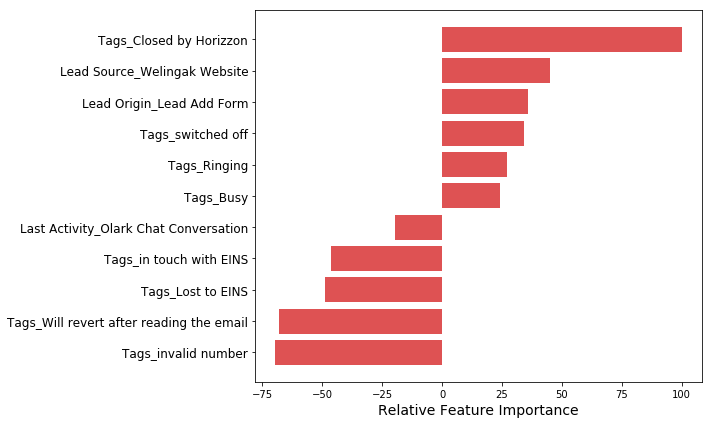

In [170]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()